# Monty Hall problem



I will be demonstrating one of my favorite statistical problem : The monty hall problem with iterations

Basic summary of the problem:

1) There are three doors, behind 1 of the doors is a car you could win if you choose the right door and remaining 2 doors have goats behind them

2) Host is aware which door the car is behind

3) You make a selection among the 3 doors to hopefully guess which door the car is behind in.

4) The host will open a door which is neither your selection or the door that has car behind it

5) The host will then give you a choice to change your selection 

# Does changing your selection improve your odds of winning the car?

Isn't this 50/50 chance anyways so why bother changing your choice?

Short answer is you should change your selection as it will double your probability of winning the car.

The probability can be calculated with Bayes' theorem, but instead of explaining complex equation, I will be iterating through 1000 cases to demonstrate this

The probability of winning with door change is 66.3%
The probability of winning without door change is 33.7%


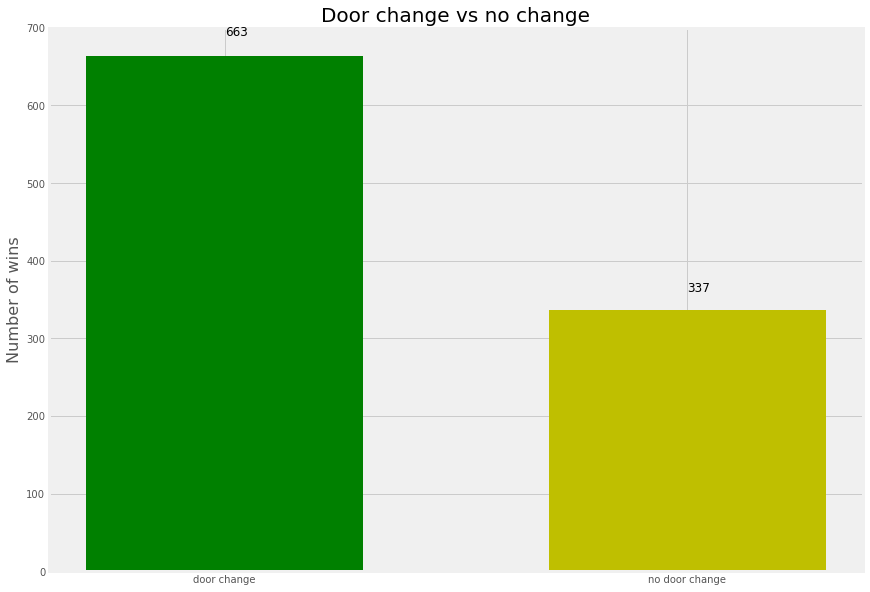

In [199]:
# Start by importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Declaring variables
full_selection=[1,2,3]
player_list=[]
car_list=[]
change=[]
no_change=[]
counter=[]

# Iteration portion
for i in range(1,1001):
    player_selection = np.random.choice(full_selection) # Player makes random selection between 3 doors
    car_location = np.random.choice(full_selection) # Random location of car is selected
    player_list.append(player_selection) 
    car_list.append(car_location) 
    
    # Retrieving list of available door for host to open that doesn't have car behind or a player selected door
    host_select = list(set(full_selection)-set(player_list)-set(car_list)) 
        
    # Case 1: player chose door with car on their 1st selection
    # Host will have 2 options to open
    # As player's initial selection was the door with car, changing the door is loss no change is win
    if len(host_select)==2: 
        host_opens = np.random.choice(host_select)
        change.append(0)
        no_change.append(1)

    # Case 2: player did not choose door with car on their 1st selection
    # Host will have 1 options to open (Can't choose door with car and player selection)
    # As player's initial selection wasn't the door with car, changing the door is win no change is loss
    else: 
        host_opens = host_select[0]
        change.append(1)
        no_change.append(0)

    player_list=[]
    car_list=[]
    counter.append(i) 

# Plotting bar chart showing number of wins with door change and without the door change in 1000 iterations
# Result is rather shocking. Out of 1000 iterations, cases of winning with door change is almost double of that of chances of winning without door change.
# If you are interested, check out conditional probabilty and Bayes' theorem to see why this occurs.
plt.figure(figsize=(13,10))
plt.bar(['door change','no door change'],[np.sum(change),np.sum(no_change)],width=[0.6,0.6],align='center',color=["g","y"])
plt.ylabel('Number of wins',fontsize=16)
plt.title('Door change vs no change',fontsize=20)
plt.ylim(0,700)
plt.annotate(np.sum(change),('door change',690),fontsize=12)
plt.annotate(np.sum(no_change),('no door change',360),fontsize=12);
print("The probability of winning with door change is {}%".format(round(np.mean(change)*100,2)))
print("The probability of winning without door change is {}%".format(round(np.mean(no_change)*100,2)))

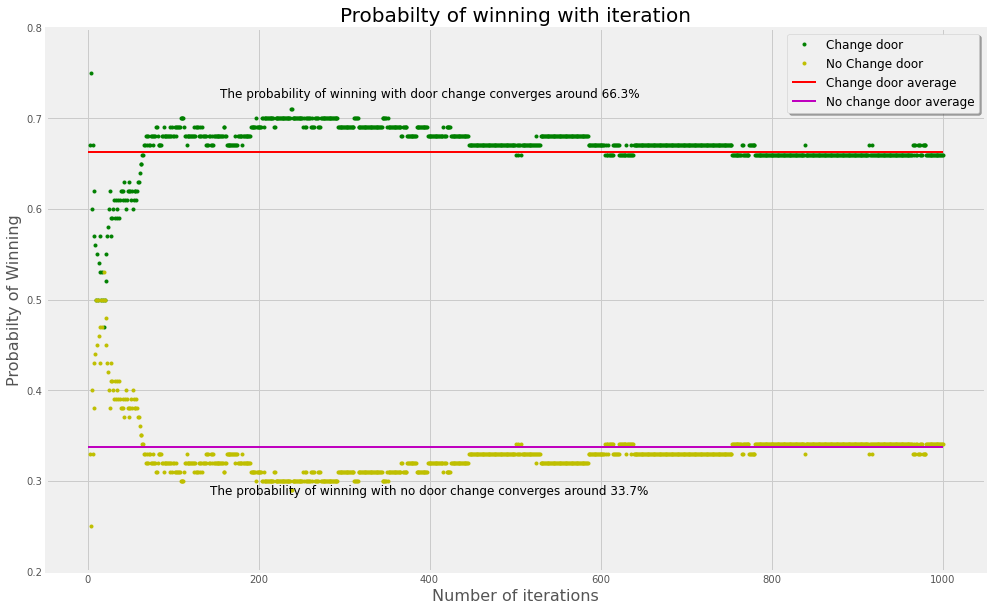

In [201]:
# To demonstrate moving average of the winning % I'm plotting moving average on number of iteration

# Below is appending moving average per iteration for winning probabilty of changing door and not changing door
moving_average_list_change = []
moving_average_list_no_change = []
for i in range(1,1001):
    moving_average_change = round(np.sum(change[0:i])/i,2)
    moving_average_list_change.append(moving_average_change)
    moving_average_no_change = round(np.sum(no_change[0:i])/i,2)
    moving_average_list_no_change.append(moving_average_no_change)

# Plotting moving average of 1000 iteration 
# Probabilty of winning by changing door will converge around 2/3 and probability of winning without changing door will converge around 1/3 with more iteration
average_line_change = [round(np.mean(change),4)]*1000
average_line_no_change = [round(np.mean(no_change),4)]*1000
plt.figure(figsize=(15,10))
plt.xlabel('Number of iterations',fontsize=16)
plt.ylabel('Probabilty of Winning',fontsize=16)
plt.title('Probabilty of winning with iteration',fontsize=20)
plt.plot(counter,moving_average_list_change,'g.',label='Change door')
plt.plot(counter,moving_average_list_no_change, 'y.', label='No Change door')
plt.plot(counter,average_line_change, label='Change door average', linewidth=2.0, color='r')
plt.plot(counter,average_line_no_change, label='No change door average', linewidth=2.0, color='m')
plt.grid(True, axis='x')
plt.ylim(0.2,0.80)
plt.text(400,np.mean(change)+0.06,'The probability of winning with door change converges around {}%'.format(round(np.mean(change)*100,2)), fontsize=12, horizontalalignment='center')
plt.text(400,np.mean(no_change)-0.052,'The probability of winning with no door change converges around {}%'.format(round(np.mean(no_change)*100,2)), fontsize=12, horizontalalignment='center')
plt.legend(shadow=True, fontsize="large");